In [1]:
path = %pwd
print(path)

c:\python\20191207-yyyymmdd-第四階段-假日\20200201-day6\PM


In [2]:
import ast , numpy as np
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')

with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('int')
    

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_data[2, :, :, :].reshape(28, 28), cmap='gray_r')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
# 檢查數據狀況
train_data.shape, train_labels.shape, train_labels[:1]

((50, 28, 28, 1), (50, 3), array([[0, 1, 0]]))

In [5]:
# 建立model 
# the Sequential model
# the Model class used with the functional API.

In [6]:
# the Sequential model type II
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same', input_shape=(28, 28, 1)) )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( MaxPooling2D(2,2) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Flatten())

model.add( Dense(32, activation='relu', input_dim=784) )
model.add( Dense(3, activation='softmax') )
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 5)         105       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 5)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 5)           105       
_________________________________________________________________
flatten_1 (Flatten)          (None, 245)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [7]:
# dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
# Keras : 2.3.0
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('weights.hdf5', monitor='accuracy', save_best_only=True, verbose=1) # 顯示變更部分
callbacks_list = [checkpoint]

In [8]:
# 編譯
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history = model.fit(train_data, train_labels, batch_size=10, 
                    epochs=100, 
                    verbose=0, 
                    validation_split=0.2, 
                    callbacks = callbacks_list)


Epoch 00001: accuracy improved from -inf to 0.35000, saving model to weights.hdf5

Epoch 00002: accuracy improved from 0.35000 to 0.42500, saving model to weights.hdf5

Epoch 00003: accuracy did not improve from 0.42500

Epoch 00004: accuracy did not improve from 0.42500

Epoch 00005: accuracy improved from 0.42500 to 0.47500, saving model to weights.hdf5

Epoch 00006: accuracy did not improve from 0.47500

Epoch 00007: accuracy improved from 0.47500 to 0.62500, saving model to weights.hdf5

Epoch 00008: accuracy improved from 0.62500 to 0.77500, saving model to weights.hdf5

Epoch 00009: accuracy improved from 0.77500 to 0.95000, saving model to weights.hdf5

Epoch 00010: accuracy did not improve from 0.95000

Epoch 00011: accuracy did not improve from 0.95000

Epoch 00012: accuracy did not improve from 0.95000

Epoch 00013: accuracy did not improve from 0.95000

Epoch 00014: accuracy improved from 0.95000 to 0.97500, saving model to weights.hdf5

Epoch 00015: accuracy did not improv

In [9]:
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history.history.keys()
# history.history.get('loss'), history.history.get('accuracy')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

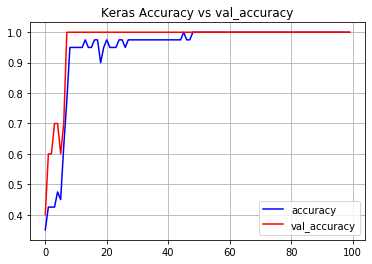

In [10]:
import matplotlib.pyplot as plt
plt.title('Keras Accuracy vs val_accuracy')

plt.plot(history.history.get('accuracy'), color='blue')
plt.plot(history.history.get('val_accuracy'), color='red')
plt.legend(['accuracy', 'val_accuracy'])

plt.grid()
plt.show()

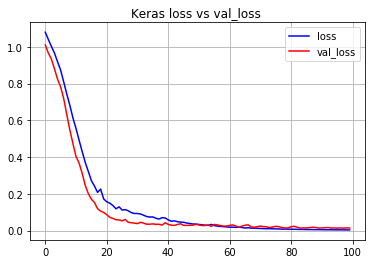

In [11]:
import matplotlib.pyplot as plt
plt.title('Keras loss vs val_loss ')
plt.plot(history.history.get('loss'), color='blue')
plt.plot(history.history.get('val_loss'), color='red')
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

In [12]:
model.evaluate(train_data, train_labels)[1] * 100.0

50/50 [==============================] - 1s 12ms/step


100.0

In [13]:
# 找出過去幾次訓練中的最佳參數

model.load_weights('weights.hdf5')
np.sum(model.predict_classes(train_data[:]) == np.argmax(train_labels, axis=1)) / len(train_data) * 100

98.0

In [14]:
# 檢視載入權重
model.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(2, 2, 1, 5) dtype=float32, numpy=
 array([[[[-0.36938208,  0.19806547, -0.36564037,  0.62442464,
           -0.32662523]],
 
         [[ 0.18289933,  0.5297035 ,  0.38630867,  0.33457714,
           -0.2514214 ]]],
 
 
        [[[-0.35298294,  0.10774943,  0.1893332 , -0.03414788,
            0.3385535 ]],
 
         [[ 0.08570529,  0.19817537, -0.14633386,  0.16581507,
           -0.44757274]]]], dtype=float32)>,
 <tf.Variable 'conv2d_1/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 0.00617855,  0.0366969 , -0.00956848,  0.04294069,  0.02018971],
       dtype=float32)>,
 <tf.Variable 'conv2d_2/kernel:0' shape=(2, 2, 5, 5) dtype=float32, numpy=
 array([[[[ 0.405803  ,  0.36320308, -0.01263222, -0.03139592,
            0.4086631 ],
          [-0.04954287,  0.4414243 ,  0.39344373, -0.14103495,
            0.23832467],
          [-0.2781692 , -0.08532275, -0.01478101, -0.3842534 ,
            0.12909268],
          [-0.17100357,  0.0434792 ,  0